<a href="https://colab.research.google.com/github/Lior-Baruch/Computational-geometry/blob/main/HW1_CG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from math import atan2

In [46]:
# plot hull (for testing and understanding)
def plot_hull(hull):
    points = hull.points
    plt.plot(points[:,0], points[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

def plot_points(points):
    plt.plot(points[:,0], points[:,1], 'o')

In [38]:
# Q.1.1 - Write a program that sorts a given set on n integers utilizing a function that computes the
#convex hull of a set of points in the plane.
def sort_using_convex_hull(int_arr):
    # Create a set of points using the integers as coordinates
    points = np.array([[number, number*number] for number in int_arr])

    # Compute the convex hull of the points
    hull = ConvexHull(points)

    # Sort the original set of numbers using the vertices of the convex hull
    sorted_numbers = [points[vertex, 0] for vertex in hull.vertices]
    min_index = np.argmin(sorted_numbers)
    sorted_numbers = np.roll(sorted_numbers, -min_index)
    return sorted_numbers

unsorted_arr = [8 0 5 3 1 9 0 8 9 6]
sorted_arr = [0 1 3 5 6 8 9]


In [ ]:
# Test Q.1.1
unsorted_arr = np.random.randint(10, size=10)
sorted_arr = sort_using_convex_hull(unsorted_arr)

print("unsorted_arr = {}".format(unsorted_arr))
print("sorted_arr = {}".format(sorted_arr))

In [76]:
# Q.1.2.1 - Write a program that sorts a given set P of points into a counterclockwise circular order about an anchor
#point (o in the picture below) that is strictly inside the convex hull of P, e.g., the center of mass of the
#points (their average).

atan2_vec = np.vectorize(atan2)

def sort_counterclockwise_circular(points):
  # Convert the points to a numpy array
  points = np.array(points)

  # Compute the mean of the x and y coordinates of the points
  x_mean = np.mean(points[:, 0])
  y_mean = np.mean(points[:, 1])

  print("anchor = {}".format((x_mean, y_mean)))

  # Sort the points by their polar angle with the (x_mean, y_mean), in
  # counterclockwise order
  return np.array(sorted(points, key=lambda point: atan2(point[1] - y_mean, point[0] - x_mean), reverse=True))

anchor = (54.9, 60.8)
[[67 39]
 [ 2 97]
 [17 84]
 [86 24]
 [80 88]
 [54 89]
 [66 86]
 [59 30]
 [45 15]
 [73 56]]
[[17 84]
 [ 2 97]
 [54 89]
 [66 86]
 [80 88]
 [73 56]
 [86 24]
 [67 39]
 [59 30]
 [45 15]]


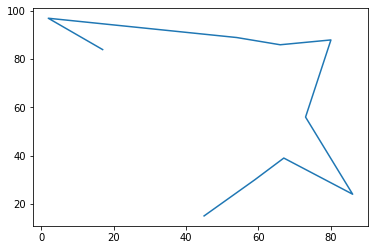

In [83]:
# Test Q.1.2.1

points_test = np.random.randint(low = 0, high = 100, size = (10,2))
points_sorted_circular_test = sort_counterclockwise_circular(points_test)

#print(points_test)
#print(points_sorted_circular_test)
#plot_points(points_test)
#plot_points(points_sorted_circular_test)
#plt.plot(points_test[:,0], points_test[:,1])
plt.plot(points_sorted_circular_test[:,0], points_sorted_circular_test[:,1])
